## ex1. Simple linear regression

#### Input data: ex1data1.txt

The ex1data1.txt contains the dataset for our linear regression problem. The 
first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Import the data

In [9]:
# The data contains no header row. so we use names=[] to pass the List of column names to use.
# Check the data is loaded correctly
profit=pd.read_csv('ex1data1.txt', names=['pop', 'profit']) 
print(profit.head(2))
print('\t')
print(profit.tail(2))
print('\t')
print(profit.shape)

      pop   profit
0  6.1101  17.5920
1  5.5277   9.1302
	
        pop   profit
95  13.3940  9.05510
96   5.4369  0.61705
	
(97, 2)


In [10]:
profit.shape[1]

2

### 2. Plotting the data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population).

Text(0,0.5,'Profit in $10,000s')

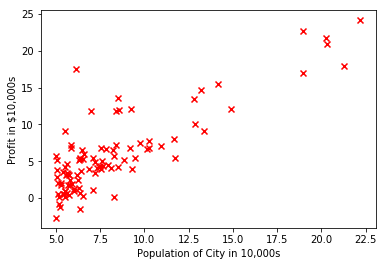

In [11]:
plt.scatter(x=profit['pop'], y=profit['profit'], c='red', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

### 3. Gradient descent


In [12]:
# Prepare data for gradient descent
m=profit.shape[0] # number of observations

X=pd.concat((pd.DataFrame(np.ones((m,1))), profit['pop']), axis=1) # add x0=1 for X
y=profit['profit']
#initial theta value
theta=np.zeros((2,1))
iterations=1500
alpha=0.01  #learning rate

#### 2.1 Computing the cost function or error function J(theta)

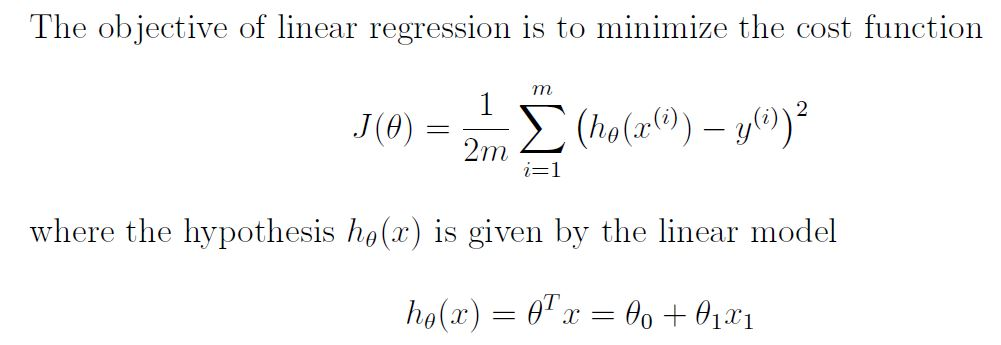

In [13]:
from IPython.display import Image
PATH = "../pic/"
Image(filename = PATH + "simple linear regression cost function.JPG", width=600, height=150)

In [ ]:
def computeCost(X, y, theta):
    
    """
    Compute cost function J(theta) for simple linear regression
    X: feature matrix including the x0=1 for intercept
    y: response variable
    theta: initial value of the theta
    """
    m = X.shape[0]
    J=1/(2)*((X.dot(theta)[0]-y)**2).mean()
    return J

In [ ]:
print('The initial cost function is: ', computeCost(X, y, theta))
print('The true cost should be 32.07')

#### 2.2 Compute the gradient descent function

In [ ]:
from IPython.display import Image
Image(filename="../pic/gradient.jpg", height=130, width=600)

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    """
    GRADIENTDESCENT Performs gradient descent to learn theta 
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    theta: initial value
    alpha: learning rate
    num_iters: Number of iterations
    """

# Initialize some useful values
    m = y.shape[0] # number of training examples
    J_history = np.zeros((num_iters, 1))
    theta_history=np.zeros((num_iters, 2))

    for iter in range(num_iters):
        #theta=theta-(alpha/m*(np.array(X.dot(theta)[0]-np.array(y)).reshape(1,m).dot(X)).reshape(2,1))
        theta=theta-np.array((alpha/m*((X.dot(theta)[0]-y).dot(X)))).reshape(2,1)
         
        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
        theta_history[iter]=theta.reshape(1,2)

    return (theta, J_history, theta_history)

In [ ]:
(theta, J_history, theta_history)=gradientDescent(X, y, theta, alpha, 1500)
theta

#### 2.3 automatic convergence test

If the learning rate alpha is chosen correctly, the cost function J(theta) should decrease on every iteration. For example, we can declare convergence if J(theta) decreases by less than 10^(-3) in one iteration. 

In [ ]:
# automatic convergence test to check whether J_history is decreasing in each iteration
plt.plot(np.arange(1500), J_history)
plt.title('Automatic convergence test')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J(theta)')

In [ ]:
plt.plot(np.arange(1500), theta_history[:,0])
plt.title("Automatic convergence test")
plt.xlabel('Number of iterations')
plt.ylabel('theta_0')

In [ ]:
plt.plot(np.arange(1500), theta_history[:,1])
plt.title('Automatic convergence test')
plt.xlabel('Number of iterations')
plt.ylabel('theta_1')

#### 2.4 Use the final parameters to plot the linear fit

In [ ]:
# calculate the y_hat
y_hat=X.dot(theta)

In [ ]:
plt.scatter(profit['pop'], profit['profit'], c='red', marker='x', label='Training data')
plt.plot(profit['pop'], y_hat, c='blue', label='Linear Regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')

#### 2.5 Make predictions for future value

In [ ]:
predict1=np.array([1,3.5]).dot(theta) # pop=3.5
print(predict1)
predict2=np.array([1,7]).dot(theta) # pop=7
print(predict2)

#### 2.6 Visualizing J(theta) by contour plot and surface plot 

##### 2.6.1 Contour plot

In [ ]:
# The data to fit
m = 20
# true value of theta0 and theta1
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[:,np.newaxis,np.newaxis],
                   theta1_grid[np.newaxis,:,np.newaxis])
# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot, true theta0 and theta1 value
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).

N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))
print('theta values used for the steps:', theta)

# Annotate the cost function plot with coloured points indicating the parameters chosen and red arrows indicating 
# the steps down the gradient. Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
# plot the points on the arrow
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

##### 2.6.2 Surface plot

In [ ]:
# Surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
# Below step already done in the contour plot above
# theta0_grid, theta1_grid = np.meshgrid(theta0_grid, theta1_grid) # necessary for 3D graph
surf = ax.plot_surface(theta0_grid, theta1_grid, J_grid, cmap=cm.coolwarm, rstride=2, cstride=2)
fig.colorbar(surf)
plt.xlabel('theta_0')
plt.ylabel('theta_1')